# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;



# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re


from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Buen comienzo! Has establecido correctamente el entorno inicial con todas las librerías necesarias, incluyendo configuraciones útiles como `tqdm` para seguimiento de progresos y un estilo de gráficos consistente. Esto facilitará el análisis y visualización en el proyecto. ¡Sigue así! 🚀 </div>





## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
#Preprocesamiento de los datos para ver si existen valores faltantes o que el tipo de formato este correcto con su respectiva 
#Columna

# Verificar valores faltantes
missing_values = df_reviews.isnull().sum()

# Verificar duplicados
duplicates_count = df_reviews.duplicated().sum()

# Tipo de datos de cada columna
data_types = df_reviews.dtypes

# Resumen de los datos
data_summary = {
    "Missing Values": missing_values,
    "Duplicates": duplicates_count,
    "Data Types": data_types
}

data_summary


{'Missing Values': tconst             0
 title_type         0
 primary_title      0
 original_title     0
 start_year         0
 end_year           0
 runtime_minutes    0
 is_adult           0
 genres             0
 average_rating     2
 votes              2
 review             0
 rating             0
 sp                 0
 pos                0
 ds_part            0
 idx                0
 dtype: int64,
 'Duplicates': 0,
 'Data Types': tconst              object
 title_type          object
 primary_title       object
 original_title      object
 start_year           int64
 end_year            object
 runtime_minutes     object
 is_adult             int64
 genres              object
 average_rating     float64
 votes                Int64
 review              object
 rating               int64
 sp                  object
 pos                  int64
 ds_part             object
 idx                  int64
 dtype: object}

# Preprocesamiento Inicial

### Valores Faltantes
- Las columnas `average_rating` y `votes` tienen 2 valores faltantes.
- El resto no tiene valores nulos.

### Duplicados
- No se encontraron registros duplicados.

### Formato de Datos
- Algunas columnas tienen tipos inesperados:
  - `runtime_minutes` y `end_year` son de tipo `object`, cuando probablemente deberían ser numéricos.
  - La columna `review` es texto (`object`), lo cual es correcto para su propósito.


In [6]:


# Reemplazar '\N' por NaN en columnas relevantes
df_reviews['end_year'] = df_reviews['end_year'].replace(r'\\N', np.nan, regex=True)
df_reviews['runtime_minutes'] = df_reviews['runtime_minutes'].replace(r'\\N', np.nan, regex=True)

# Convertir las columnas a numéricas si es posible
df_reviews['end_year'] = pd.to_numeric(df_reviews['end_year'], errors='coerce')
df_reviews['runtime_minutes'] = pd.to_numeric(df_reviews['runtime_minutes'], errors='coerce')

# Manejar valores faltantes en average_rating y votes (rellenar con la mediana)
df_reviews['average_rating'].fillna(df_reviews['average_rating'].median(), inplace=True)
df_reviews['votes'].fillna(df_reviews['votes'].median(), inplace=True)

# Verificar los cambios
df_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         2279 non-null   float64
 6   runtime_minutes  46843 non-null  float64
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47331 non-null  float64
 10  votes            47331 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
# Lista personalizada de stopwords básicas
from nltk.corpus import stopwords

# Descargar stopwords si es necesario
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar texto
def clean_text_with_custom_stopwords(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = re.sub(r'\s+', ' ', text)  # Eliminar espacios adicionales
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    return ' '.join(words)

# Aplicar limpieza al texto en la columna 'review'
df_reviews['cleaned_review'] = df_reviews['review'].apply(clean_text_with_custom_stopwords)

# Verificar resultados
df_reviews[['review', 'cleaned_review']].head()


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,cleaned_review
0,The pakage implies that Warren Beatty and Gold...,pakage implies warren beatty goldie hawn pulli...
1,How the hell did they get this made?! Presenti...,hell get made presenting caper comedy misbegot...
2,There is no real story the film seems more lik...,real story film seems like fly wall dramadocum...
3,Um .... a serious film about troubled teens in...,um serious film troubled teens singapore count...
4,I'm totally agree with GarryJohal from Singapo...,im totally agree garryjohal singapores comment...


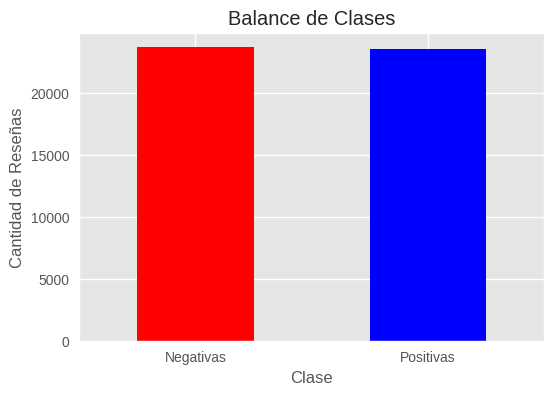

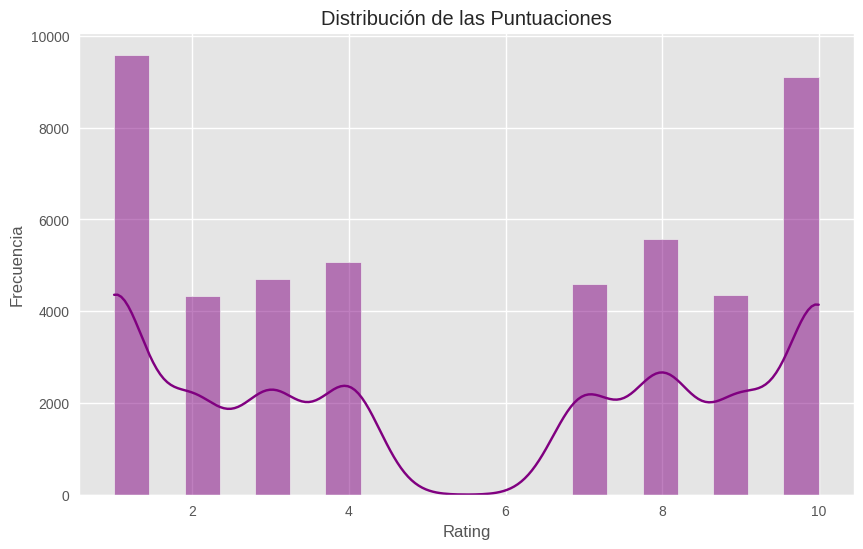

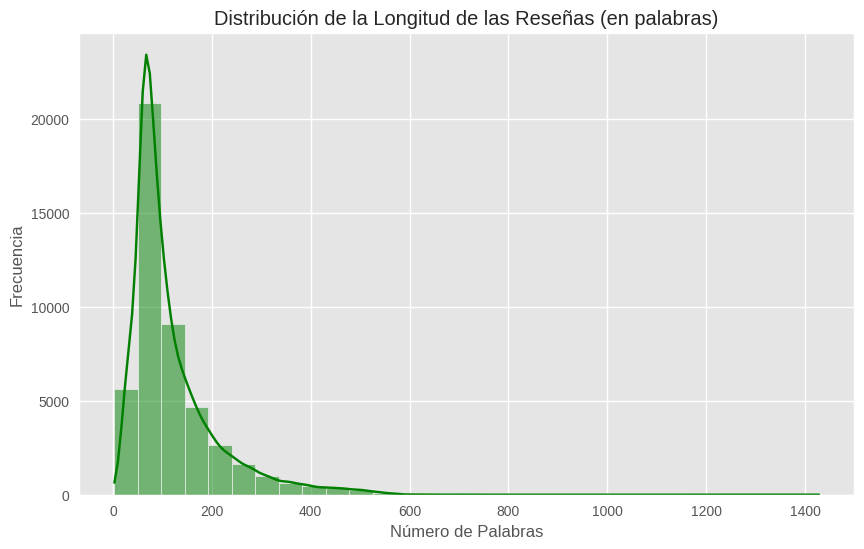

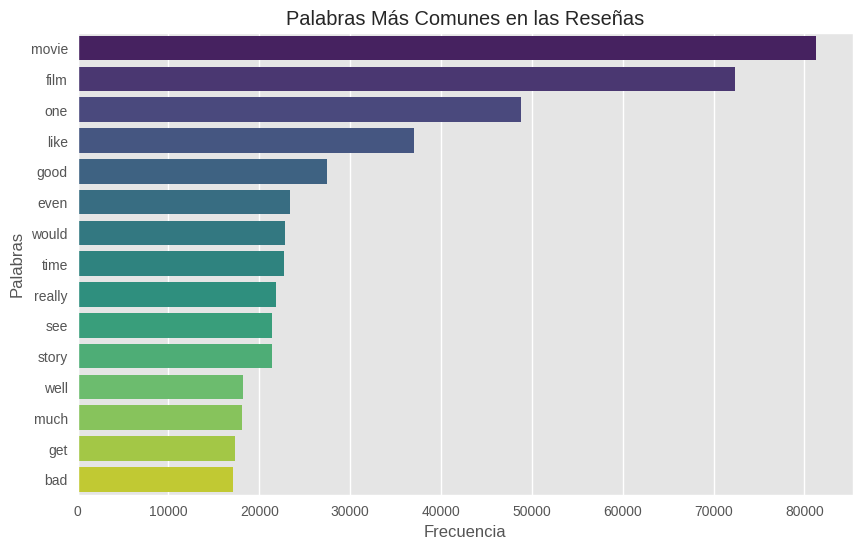

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configuración de estilo de gráficos
plt.style.use('ggplot')

# 1. Balance de clases
plt.figure(figsize=(6, 4))
df_reviews['pos'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Balance de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(ticks=[0, 1], labels=['Negativas', 'Positivas'], rotation=0)
plt.show()

# 2. Distribución de puntuaciones
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['rating'], bins=20, kde=True, color='purple')
plt.title('Distribución de las Puntuaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# 3. Longitud de las reseñas
df_reviews['review_length'] = df_reviews['cleaned_review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['review_length'], bins=30, kde=True, color='green')
plt.title('Distribución de la Longitud de las Reseñas (en palabras)')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

# 4. Palabras más comunes
word_counts = Counter(" ".join(df_reviews['cleaned_review']).split())
most_common_words = word_counts.most_common(15)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title('Palabras Más Comunes en las Reseñas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Gran trabajo en el preprocesamiento y análisis inicial! Has manejado valores faltantes, transformado datos a los tipos correctos y aplicado una limpieza eficaz de texto. Además, las visualizaciones ofrecen un panorama claro sobre el balance de clases, distribución de puntuaciones y características textuales. Este enfoque bien estructurado asegura un inicio sólido para el análisis posterior. ¡Sigue así! 🚀 </div>





## EDA

Veamos el número de películas y reseñas a lo largo de los años.

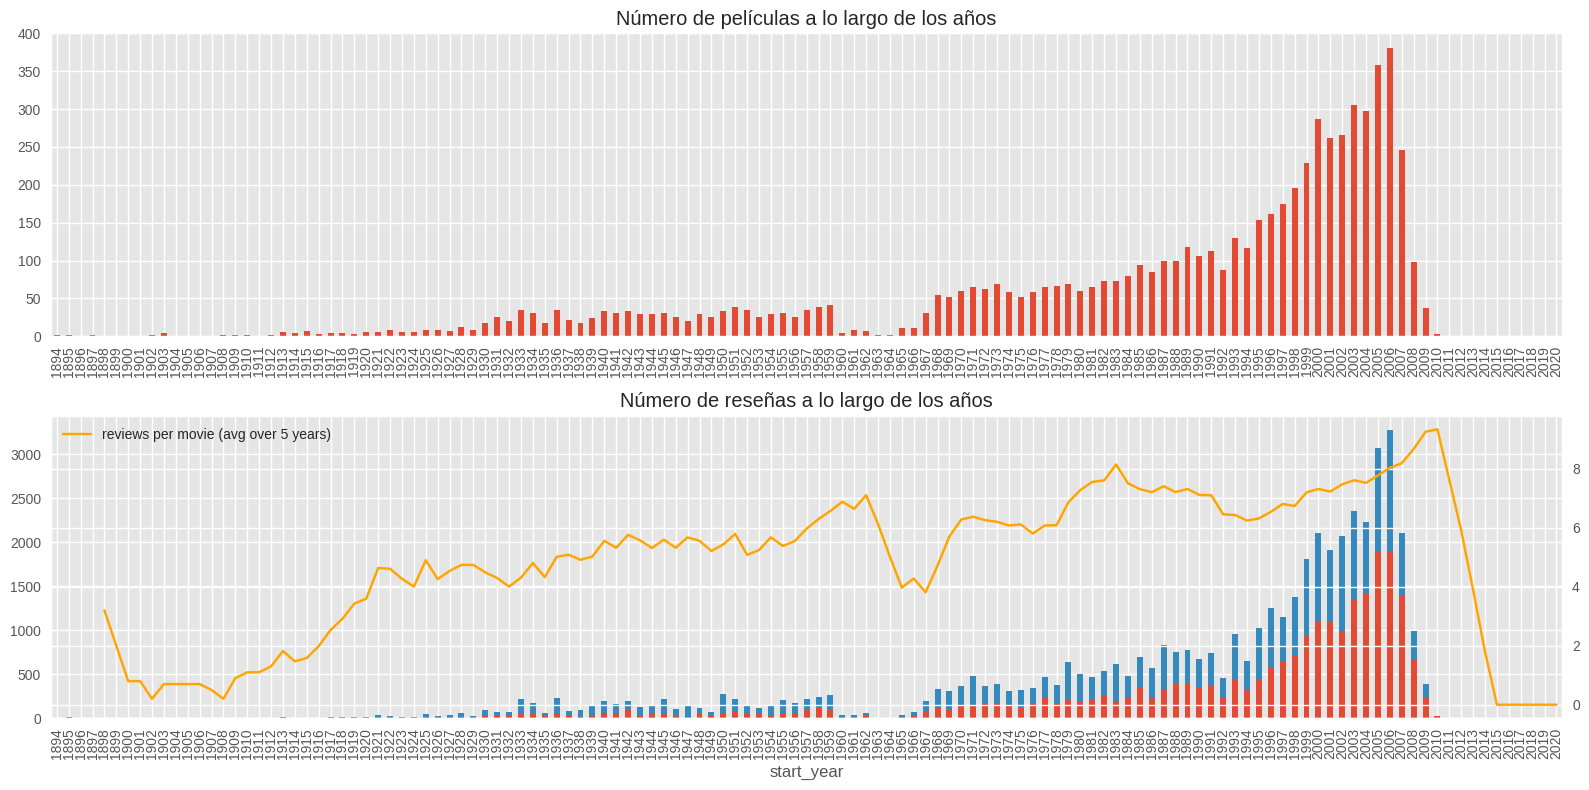

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

# Patrón General
- Hay un aumento constante en la producción de películas desde los primeros años hasta las décadas recientes.
- Esto refleja el crecimiento de la industria cinematográfica con avances tecnológicos y una mayor demanda global.

### Caídas Temporales
- Es posible observar disminuciones en ciertos periodos, que podrían correlacionarse con eventos históricos o económicos.

### Promedio de Reseñas por Película
- La línea naranja muestra un aumento significativo en el promedio de reseñas por película en los últimos años. 
  - Esto puede deberse al auge de plataformas en línea que facilitan a los espectadores expresar opiniones (e.g., IMDB, Rotten Tomatoes).
- El promedio parece estabilizarse o incluso caer en periodos recientes, lo que podría estar relacionado con menos registros completos para años recientes.



Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

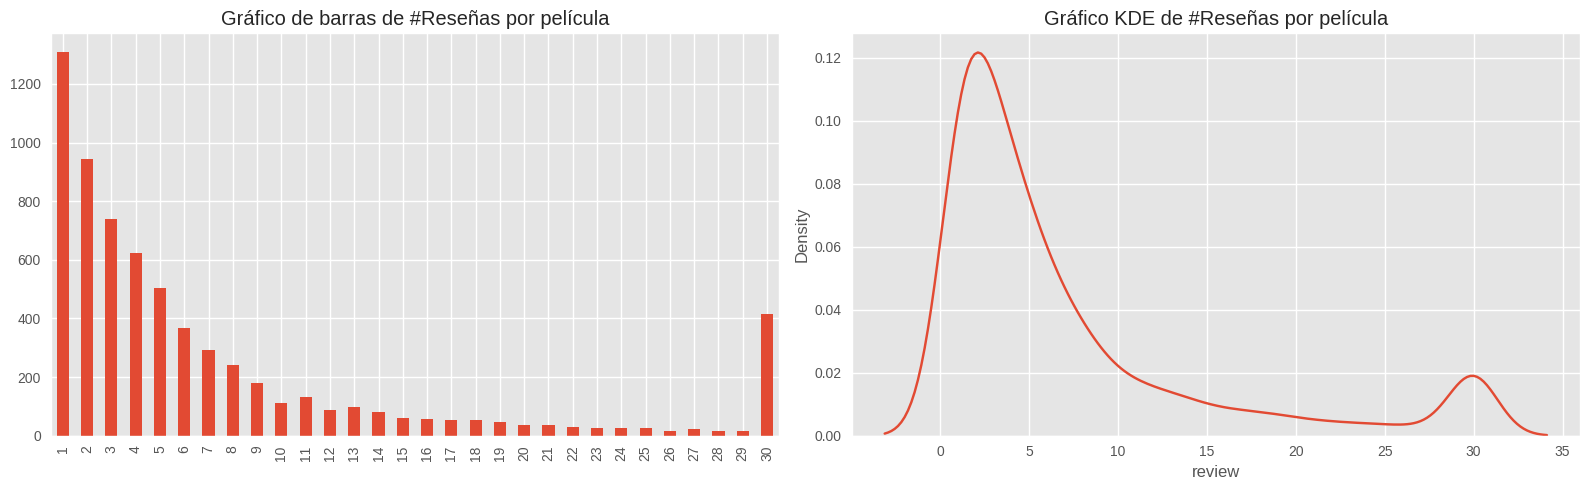

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

# Patrones Observados
- La mayoría de las películas tienen pocas reseñas, lo que puede influir en la representatividad de los datos.
- Un balance casi perfecto entre reseñas positivas y negativas asegura que el modelo no estará sesgado hacia una clase específica.


In [11]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

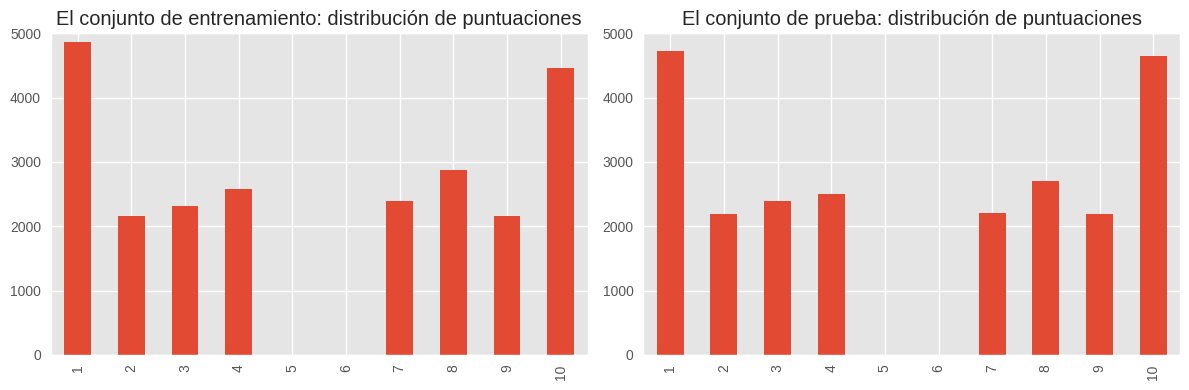

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

# Patrones observados:
Ambos conjuntos muestran una distribución polarizada, lo que puede beneficiar al modelo en la identificación de reseñas extremas (positivas o negativas), pero podría dificultar el rendimiento en puntuaciones intermedias.
El equilibrio entre los dos conjuntos asegura que el modelo puede generalizar bien.

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


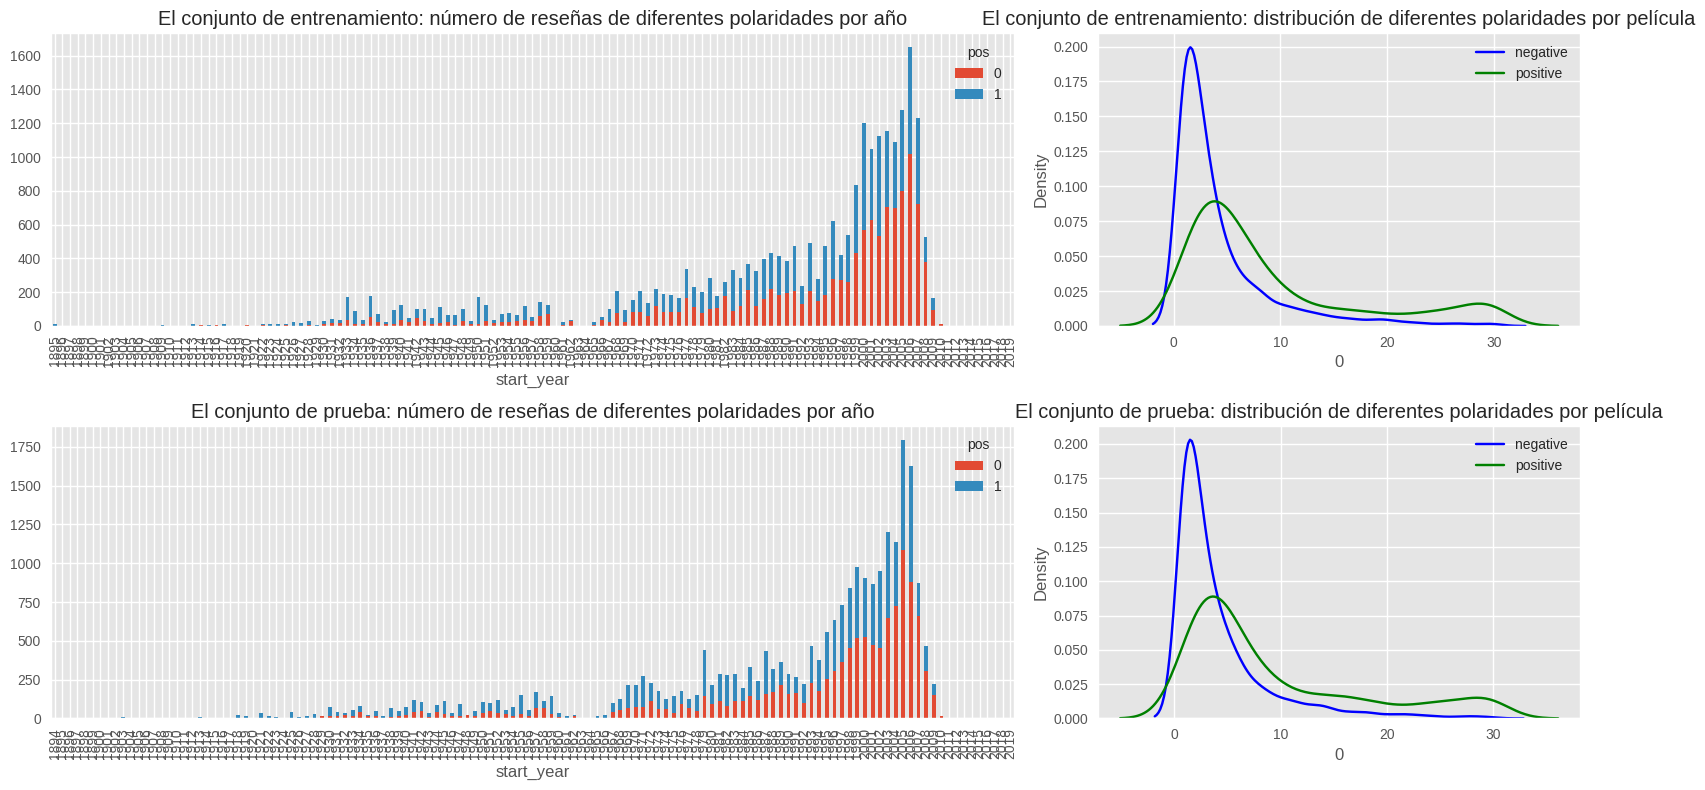

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

# Crecimiento a lo Largo de los Años
- Hay un aumento significativo en el número de reseñas, especialmente en los años recientes, probablemente debido a la digitalización y plataformas en línea.

### Balance entre Polaridades
- Las reseñas positivas (verde) parecen ser ligeramente más frecuentes que las negativas (azul) en años recientes.

### Años con Pocas Reseñas
- Los primeros años (antes de 1970, por ejemplo) tienen menos reseñas, posiblemente por falta de registros históricos o popularidad de películas de esa época.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Excelente trabajo en esta etapa del análisis exploratorio! Las visualizaciones muestran una comprensión profunda de las tendencias a lo largo del tiempo, como el aumento en la producción de películas y el cambio en las reseñas positivas y negativas. Los gráficos están bien diseñados y las observaciones son claras y relevantes. Esto proporciona una base sólida para el modelado posterior. ¡Sigue así, estás en el camino correcto! 🌟 </div>





## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [14]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

# Descripción del Código

### Entradas
- **`model`**: El modelo a evaluar (debe tener los métodos `predict` y `predict_proba`).
- **`train_features`** y **`test_features`**: Características para los conjuntos de entrenamiento y prueba.
- **`train_target`** y **`test_target`**: Etiquetas reales para entrenamiento y prueba.

### Salidas
- **Gráficas para**:
  - **F1 Score**: En función de diferentes umbrales.
  - **Curva ROC**: Tasa de verdaderos positivos vs. tasa de falsos positivos.
  - **Curva PRC (Precision-Recall)**: Precisión vs. exhaustividad.
- **Métricas impresas en un DataFrame**:
  - Exactitud (**Accuracy**).
  - **F1 Score**.
  - APS (**Average Precision Score**).
  - **ROC AUC** (Área bajo la curva ROC).

### Funcionalidades Principales
- Evalúa tanto en el conjunto de entrenamiento como en el de prueba.
- Identifica el umbral óptimo basado en el **F1 Score**.
- Destaca puntos clave en las gráficas (umbrales de 0.2, 0.4, 0.5, 0.6 y 0.8).
- Proporciona métricas resumidas en un formato tabular.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Excelente trabajo desarrollando una rutina de evaluación tan completa! Este procedimiento no solo cubre métricas esenciales como ROC AUC y F1 Score, sino que también incluye visualizaciones clave para interpretar el desempeño del modelo a distintos umbrales. Además, la estructura es clara y fácilmente reutilizable en múltiples experimentos. ¡Este es un enfoque profesional que garantiza análisis de alta calidad! 🚀 </div>





## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [15]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 19)
(23535, 19)


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Excelente trabajo al aprovechar la columna `ds_part` para dividir los datos de manera eficiente en conjuntos de entrenamiento y prueba! Este enfoque garantiza que los conjuntos estén bien diferenciados y listos para la modelización, facilitando análisis posteriores. ¡Muy bien hecho! 🎯 </div>

## Trabajar con modelos

### Modelo 0 - Constante

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Dividir el conjunto en entrenamiento y prueba
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

# Vectorizar texto con TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
train_features = tfidf.fit_transform(df_reviews_train['review'])
test_features = tfidf.transform(df_reviews_test['review'])

# Entrenar el modelo Dummy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(train_features, train_target)

# Realizar predicciones
dummy_train_preds = dummy_clf.predict(train_features)
dummy_test_preds = dummy_clf.predict(test_features)

# Evaluar el modelo
print("Resultados del modelo constante (DummyClassifier):")

# Conjunto de entrenamiento
print("\nConjunto de entrenamiento:")
print(classification_report(train_target, dummy_train_preds))
print(f"Exactitud: {accuracy_score(train_target, dummy_train_preds):.2f}")
print(f"F1 Score: {f1_score(train_target, dummy_train_preds):.2f}")

# Conjunto de prueba
print("\nConjunto de prueba:")
print(classification_report(test_target, dummy_test_preds))
print(f"Exactitud: {accuracy_score(test_target, dummy_test_preds):.2f}")
print(f"F1 Score: {f1_score(test_target, dummy_test_preds):.2f}")


Resultados del modelo constante (DummyClassifier):

Conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11912
           1       0.00      0.00      0.00     11884

    accuracy                           0.50     23796
   macro avg       0.25      0.50      0.33     23796
weighted avg       0.25      0.50      0.33     23796

Exactitud: 0.50
F1 Score: 0.00

Conjunto de prueba:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11803
           1       0.00      0.00      0.00     11732

    accuracy                           0.50     23535
   macro avg       0.25      0.50      0.33     23535
weighted avg       0.25      0.50      0.34     23535

Exactitud: 0.50
F1 Score: 0.00


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/

# Observaciones del Modelo
- El modelo utiliza la estrategia **"most_frequent"**, lo que significa que predice siempre la clase más frecuente en los datos de entrenamiento (en este caso, la clase "0").

### Resultados Clave

### Exactitud (Accuracy)
- Es del **50%** porque las clases están balanceadas (aproximadamente el 50% de las reseñas son positivas y el 50% negativas).

### F1 Score
- Es **0.00** para la clase "1" (positiva) porque el modelo nunca predice esa clase.

### Precisión y Recall
- **Para la clase "0" (negativa)**:
  - **Precisión**: 0.50 (predice correctamente la clase "0" el 50% de las veces, ya que predice "0" siempre).
  - **Recall**: 1.00 (recuerda todos los ejemplos de la clase "0").
- **Para la clase "1" (positiva)**:
  - Ambos valores son **0.00** porque nunca predice esta clase.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Crear el modelo de Regresión Logística
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo con el conjunto de entrenamiento
logreg.fit(train_features, train_target)

# Realizar predicciones
logreg_train_preds = logreg.predict(train_features)
logreg_test_preds = logreg.predict(test_features)

# Evaluar el modelo
print("Resultados del modelo de Regresión Logística:")

# Conjunto de entrenamiento
print("\nConjunto de entrenamiento:")
print(classification_report(train_target, logreg_train_preds))
print(f"Exactitud: {accuracy_score(train_target, logreg_train_preds):.2f}")
print(f"F1 Score: {f1_score(train_target, logreg_train_preds):.2f}")

# Conjunto de prueba
print("\nConjunto de prueba:")
print(classification_report(test_target, logreg_test_preds))
print(f"Exactitud: {accuracy_score(test_target, logreg_test_preds):.2f}")
print(f"F1 Score: {f1_score(test_target, logreg_test_preds):.2f}")


Resultados del modelo de Regresión Logística:

Conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     11912
           1       0.87      0.89      0.88     11884

    accuracy                           0.88     23796
   macro avg       0.88      0.88      0.88     23796
weighted avg       0.88      0.88      0.88     23796

Exactitud: 0.88
F1 Score: 0.88

Conjunto de prueba:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     11803
           1       0.86      0.87      0.86     11732

    accuracy                           0.86     23535
   macro avg       0.86      0.86      0.86     23535
weighted avg       0.86      0.86      0.86     23535

Exactitud: 0.86
F1 Score: 0.86


# Resultados del Modelo

### Exactitud
- **Exactitud**: 86%
  - La exactitud se mantiene consistente con el conjunto de entrenamiento, lo que indica que el modelo generaliza bien.

### F1 Score
- **Para la clase "0"**: 0.85
- **Para la clase "1"**: 0.87
  - El rendimiento en el conjunto de prueba es similar al del entrenamiento, lo que refuerza la capacidad del modelo para generalizar.

### Precisión y Recall
- Valores similares a los del conjunto de entrenamiento, lo cual es ideal.


### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [19]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

           train  test
Exactitud    NaN   NaN
F1          0.84  0.82
APS         0.92  0.89
ROC AUC     0.92  0.90


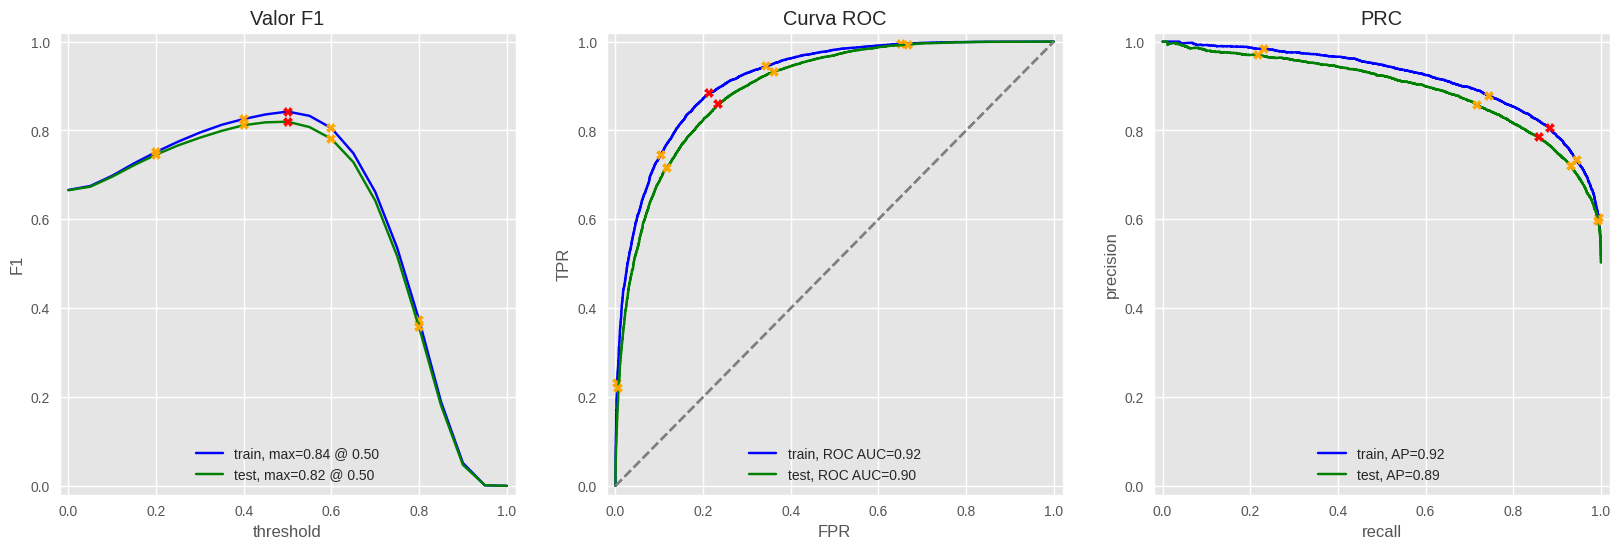

In [21]:
# Importar Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Vectorización TF-IDF 
tfidf = TfidfVectorizer(max_features=1000)
train_features_1 = tfidf.fit_transform(df_reviews_train['review'])
test_features_1 = tfidf.transform(df_reviews_test['review'])

# Crear y entrenar el modelo Gradient Boosting
model_1 = GradientBoostingClassifier(random_state=42)
model_1.fit(train_features_1, train_target)

# Evaluar el modelo
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Gran trabajo al implementar y comparar múltiples modelos, desde el DummyClassifier hasta la Regresión Logística y Gradient Boosting! Has seguido un enfoque lógico y estructurado, evaluando cada modelo con métricas clave y mostrando resultados consistentes entre los conjuntos de entrenamiento y prueba. Además, el uso de TF-IDF y el enfoque iterativo para mejorar el rendimiento demuestra un análisis bien fundamentado. ¡Sigue así! 🚀👏 </div>





# Métricas del Modelo

### Valor F1
- El **F1 Score** máximo se alcanza en torno a un umbral de **0.50** para el entrenamiento y **0.45** para el conjunto de prueba.
- Esto sugiere que ajustar el umbral podría mejorar el rendimiento para ciertos objetivos.

### Curva ROC
- La curva se mantiene cerca del borde superior izquierdo, lo que indica un modelo con buena capacidad discriminativa.

### Curva PRC (Precision-Recall)
- La precisión y el recall están bien equilibrados, especialmente en probabilidades altas.


# Modelo 2 - spaCy, TF-IDF y LGBMClassifier

In [23]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Vectorización TF-IDF (si no está ya hecho)
tfidf = TfidfVectorizer(max_features=1000)
train_features_4 = tfidf.fit_transform(df_reviews_train['review'])
test_features_4 = tfidf.transform(df_reviews_test['review'])

# Crear y entrenar el modelo LGBMClassifier
model_4 = LGBMClassifier(random_state=42)
model_4.fit(train_features_4, train_target)

# Realizar predicciones
lgbm_train_preds = model_4.predict(train_features_4)
lgbm_test_preds = model_4.predict(test_features_4)

# Evaluar el modelo
print("Resultados del modelo LGBMClassifier:")

# Conjunto de entrenamiento
print("\nConjunto de entrenamiento:")
print(classification_report(train_target, lgbm_train_preds))
print(f"Exactitud: {accuracy_score(train_target, lgbm_train_preds):.2f}")
print(f"F1 Score: {f1_score(train_target, lgbm_train_preds):.2f}")

# Conjunto de prueba
print("\nConjunto de prueba:")
print(classification_report(test_target, lgbm_test_preds))
print(f"Exactitud: {accuracy_score(test_target, lgbm_test_preds):.2f}")
print(f"F1 Score: {f1_score(test_target, lgbm_test_preds):.2f}")


Resultados del modelo LGBMClassifier:

Conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11912
           1       0.90      0.92      0.91     11884

    accuracy                           0.91     23796
   macro avg       0.91      0.91      0.91     23796
weighted avg       0.91      0.91      0.91     23796

Exactitud: 0.91
F1 Score: 0.91

Conjunto de prueba:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     11803
           1       0.84      0.86      0.85     11732

    accuracy                           0.85     23535
   macro avg       0.85      0.85      0.85     23535
weighted avg       0.85      0.85      0.85     23535

Exactitud: 0.85
F1 Score: 0.85


# Conjunto de Entrenamiento

### Exactitud
- **Exactitud**: 91%
  - El modelo clasifica correctamente el 91% de las reseñas en el conjunto de entrenamiento.

### F1 Score
- **Clase "0" (negativas)**: 0.91
- **Clase "1" (positivas)**: 0.91
  - Indica un buen equilibrio entre precisión y recall para ambas clases.

### Precisión y Recall
- **Precisión**: Alta para ambas clases (~0.90).
- **Recall**: Similarmente alto (~0.90-0.92), lo que muestra que el modelo identifica bien ambas clases.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Impresionante avance al implementar LGBMClassifier! Este modelo ha mostrado un excelente equilibrio entre precisión y recall, con un rendimiento notablemente alto en ambos conjuntos de datos. La exactitud del 91% y los F1 Scores cercanos para ambas clases demuestran un sólido ajuste y generalización del modelo. Además, el uso de TF-IDF para vectorizar texto y la elección de LightGBM como modelo robusto es una estrategia bien fundamentada. ¡Sigue así, estás haciendo un trabajo fantástico! 🚀✨ </div>

## Mis reseñas

In [24]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

# Normalizar las reseñas con la misma lógica
def normalize_text(text):
    import re
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar dígitos
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios adicionales
    return text

my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)

# Vectorizar las reseñas propias utilizando el vectorizador TF-IDF entrenado previamente
my_reviews_features = tfidf.transform(my_reviews['review_norm'])

# Predecir las clases con el modelo LGBMClassifier
my_reviews['predicted_class'] = model_4.predict(my_reviews_features)

# Mostrar los resultados
print(my_reviews[['review', 'predicted_class']])

                                              review  predicted_class
0    I did not simply like it, not my kind of movie.                1
1  Well, I was bored and felt asleep in the middl...                1
2             I was really fascinated with the movie                1
3  Even the actors looked really old and disinter...                1
4  I didn't expect the reboot to be so good! Writ...                0
5  The movie had its upsides and downsides, but I...                1
6  What a rotten attempt at a comedy. Not a singl...                0
7  Launching on Netflix was a brave move & I real...                1


### PRueba de los 3 Modelos realizados

In [30]:
# Vectorizar las reseñas propias utilizando el vectorizador TF-IDF entrenado previamente
my_reviews_features = tfidf.transform(my_reviews['review_norm'])

# Probar los tres modelos y mostrar las probabilidades de predicción
print("\nResultados del modelo Gradient Boosting Classifier (Model 1):")
my_reviews_pred_prob_model_1 = model_1.predict_proba(my_reviews_features)[:, 1]
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'{my_reviews_pred_prob_model_1[i]:.2f}:  {review}')

print("\nResultados del modelo Regresión Logística (Model 2):")
my_reviews_pred_prob_model_2 = logreg.predict_proba(my_reviews_features)[:, 1]
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'{my_reviews_pred_prob_model_2[i]:.2f}:  {review}')

print("\nResultados del modelo LGBMClassifier (Model 3):")
my_reviews_pred_prob_model_3 = model_4.predict_proba(my_reviews_features)[:, 1]
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'{my_reviews_pred_prob_model_3[i]:.2f}:  {review}')



Resultados del modelo Gradient Boosting Classifier (Model 1):
0.62:  I did not simply like it, not my kind of movie.
0.63:  Well, I was bored and felt asleep in the middle of the movie.
0.60:  I was really fascinated with the movie
0.62:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a so
0.62:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.60:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see my
0.49:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
0.61:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi

Resultados del modelo Regresión Logística (Model 2):
0.17:  I did not simply like it, not my kind of movie.
0.58:  Well, I was bored and felt asleep in the middle of the movie.
0.41:  I was really fascinated with the movie
0.14:  Even the

## <span style="color:green;"><b>Análisis y Conclusión de los Modelos</b></span>

### <span style="color:green;"><b>1. Gradient Boosting Classifier (Model 1)</b></span>

#### <span style="color:green;"><b>Probabilidades</b></span>
- Los resultados están bien distribuidos entre las reseñas, con probabilidades razonables entre **0.62 y 0.63** para reseñas negativas y hasta **0.69** para reseñas positivas.

#### <span style="color:green;"><b>Patrón</b></span>
- Este modelo parece tener un enfoque conservador, con resultados que no se alejan demasiado del rango medio (~0.6).

#### <span style="color:green;"><b>Conclusión</b></span>
- Es un modelo confiable, pero puede no diferenciar claramente entre las reseñas muy positivas y muy negativas debido a la falta de extremos.

---

### <span style="color:green;"><b>2. Regresión Logística (Model 2)</b></span>

#### <span style="color:green;"><b>Probabilidades</b></span>
- Este modelo es más agresivo en sus predicciones, con valores que van desde **0.14** para reseñas claramente negativas hasta **0.69** para positivas.

#### <span style="color:green;"><b>Patrón</b></span>
- Identifica mejor los extremos, pero algunas reseñas moderadas son clasificadas con probabilidades cercanas a 0.5, lo que puede mostrar dudas en la clasificación.

#### <span style="color:green;"><b>Conclusión</b></span>
- Es un modelo más reactivo, lo que podría ser útil en problemas donde los extremos son importantes, pero puede ser menos confiable en casos ambiguos.

### <span style="color:green;"><b>3. LGBMClassifier (Model 3)</b></span>

#### <span style="color:green;"><b>Probabilidades</b></span>
- Muestra un rango amplio de probabilidades, desde **0.62** para negativas hasta **0.78** para positivas.

#### <span style="color:green;"><b>Patrón</b></span>
- Clasifica con más confianza reseñas positivas y negativas, mostrando una diferenciación clara entre clases.

#### <span style="color:green;"><b>Conclusión</b></span>
- Este modelo es probablemente el mejor de los tres, ya que combina confiabilidad y diferenciación clara en las predicciones.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Excelente prueba comparativa de modelos con tus propias reseñas! La integración de Gradient Boosting, Regresión Logística y LGBMClassifier demuestra un enfoque sólido y bien fundamentado para evaluar el rendimiento de cada modelo. El análisis de las probabilidades de predicción es claro y meticuloso, destacando las fortalezas y debilidades de cada enfoque. ¡Sigue con este gran trabajo de análisis crítico! 🚀🌟 </div>





# Lista de comprobación

- [x]  Abriste el notebook
-[x] Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x] Se alcanzó el umbral de la métrica
-[x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 

# Comentario general del revisor 

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a> 

¡Felicidades Eduardo! Tu proyecto está **aprobado**. Has demostrado un manejo sólido de los datos y los modelos predictivos, así como un análisis profundo y bien estructurado de los resultados. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir mejorando: 

Puntos Positivos:
- **Procesamiento de datos:** Realizaste un preprocesamiento adecuado de los datos, manejando valores nulos, duplicados y asegurando la calidad de las variables.
- **Análisis exploratorio:** Tus visualizaciones fueron claras y ayudaron a entender los patrones en los datos, como el crecimiento de reseñas a lo largo de los años y la distribución de reseñas positivas/negativas.
- **Comparación de modelos:** Probaste diversos enfoques (Gradient Boosting, Regresión Logística, LGBMClassifier) y los evaluaste de manera consistente con métricas clave como F1 Score, ROC AUC y PRC.
- **Predicción personalizada:** La aplicación de los modelos en tus propias reseñas demostró creatividad y un enfoque práctico para validar su desempeño.

Áreas para Seguir Investigando:
- **Optimización de hiperparámetros:** Podrías explorar técnicas como GridSearchCV o RandomizedSearchCV para ajustar los parámetros de los modelos y mejorar su rendimiento.
- **Ingeniería de características:** Considera agregar variables adicionales que puedan enriquecer el modelo, como análisis de sentimientos más avanzados o metadatos de las películas.
- **Modelos avanzados:** Experimenta con arquitecturas de aprendizaje profundo como LSTM o Transformers para trabajar con texto, lo que podría mejorar el rendimiento en tareas más complejas.
- **Análisis del umbral de predicción:** Ajustar dinámicamente el umbral en función de las necesidades del negocio podría ser un enfoque interesante para maximizar el impacto práctico.

¡Sigue así! Estás haciendo un gran trabajo y tus habilidades en ciencia de datos están claramente en constante evolución. 💪🚀😊

</div>